In [ ]:
#Realizando as importações necessárias do matplot, numpy e pandas
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#salvando o caminho para a o csv
caminho = '/content/drive/MyDrive/Colab Notebooks/cadastro_revendas_lp.xlsx'

In [ ]:
#csv adicionado para dataframe no python carregando Dataset (EXTRAÇÃO)
df = pd.read_excel(caminho)

In [ ]:
#visualização do cabeçalho do dataframe
df.head()

,CODIGOISIMP,AUTORIZACAO,DATAPUBLICACAO,RAZAOSOCIAL,CNPJ,ENDERECO,BAIRRO,CEP,UF,MUNICIPIO,DISTRIBUIDORA,DATAVINCULACAO,CLASSE
0,1061121.0,001/GLP/PR0002247,2007-11-23,BONNO GAS COMERCIO DE GAS LTDA,5823241000154,"RUA ARAPONGAS, 397",CAPELA VELHA,83706160,PR,ARAUCARIA,INDEPENDENTE,2019-12-21 00:00:00,1 AREA - Classe II - NBR 15514
1,1046643.0,001/GLP/SP0008390,2006-09-11,CIDIGAS COMERCIO DE GAS LTDA,302480000145,"RUA CARLOS NUNES DE PAULA, 1954",JARDIM COLONIAL,12234000,SP,SAO JOSE DOS CAMPOS,ULTRAGAZ,2006-08-21 00:00:00,1 AREA - Classe II - NBR 15514
2,1041682.0,001/GLP/RS0005876,2006-01-16,COMÉRCIO E DISTRIBUIDORA DE GÁS FARROUPILHA LT...,94458767000102,"RUA BELUNO, 850",SANTA CATARINA,95180000,RS,FARROUPILHA,LIQUIGAS,2020-04-27 00:00:00,1 AREA - Classe V - NBR 15514
3,1043636.0,001/GLP/RS0006697,2006-04-27,LUIZ ANTONIO BERTOLETTI,97266456000130,"RUA SAO PEDRO, 725",LOMBA DO PINHEIRO,91570000,RS,PORTO ALEGRE,LIQUIGAS,2006-04-05 00:00:00,1 AREA - Classe IV - NBR 15514
4,1045313.0,001/GLP/RS0007553,2006-07-21,BITTENCOURT CARDOSO DISTR. GAS LT.,89216543000154,"RUA CANUDOS, 80",ESTANCIA VELHA,92030050,RS,CANOAS,LIQUIGAS,2019-06-12 00:00:00,1 AREA - Classe V - NBR 15514


In [ ]:
#visualizando informações do dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58099 entries, 0 to 58098
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODIGOISIMP     58083 non-null  float64       
 1   AUTORIZACAO     58099 non-null  object        
 2   DATAPUBLICACAO  58099 non-null  datetime64[ns]
 3   RAZAOSOCIAL     58099 non-null  object        
 4   CNPJ            58099 non-null  int64         
 5   ENDERECO        58099 non-null  object        
 6   BAIRRO          58088 non-null  object        
 7   CEP             58099 non-null  int64         
 8   UF              58099 non-null  object        
 9   MUNICIPIO       58099 non-null  object        
 10  DISTRIBUIDORA   58099 non-null  object        
 11  DATAVINCULACAO  58098 non-null  object        
 12  CLASSE          58099 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 5.8+ MB


In [ ]:
#verificando valores vaios nas colunas
sem_valor = df.isnull().sum() #caso encontre um valor nulo no dataset ele soma um valor nesse titulo
print(sem_valor) #printa os valores

CODIGOISIMP       16
AUTORIZACAO        0
DATAPUBLICACAO     0
RAZAOSOCIAL        0
CNPJ               0
ENDERECO           0
BAIRRO            11
CEP                0
UF                 0
MUNICIPIO          0
DISTRIBUIDORA      0
DATAVINCULACAO     1
CLASSE             0
dtype: int64


In [ ]:
#TRANSFORMAÇÃO - deixando apenas as tabelas que podem ser coerente para analises de padrões e identificações
distr = df[['AUTORIZACAO','DATAPUBLICACAO','RAZAOSOCIAL','CNPJ','CEP','UF','MUNICIPIO','DISTRIBUIDORA', 'CLASSE']]

In [ ]:
#verificando transformação
distr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58099 entries, 0 to 58098
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AUTORIZACAO     58099 non-null  object        
 1   DATAPUBLICACAO  58099 non-null  datetime64[ns]
 2   RAZAOSOCIAL     58099 non-null  object        
 3   CNPJ            58099 non-null  int64         
 4   CEP             58099 non-null  int64         
 5   UF              58099 non-null  object        
 6   MUNICIPIO       58099 non-null  object        
 7   DISTRIBUIDORA   58099 non-null  object        
 8   CLASSE          58099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 4.0+ MB


In [ ]:
#verificando se mesmo após as tratativas ainda sobraram valores vaios nas colunas
sem_valor = distr.isnull().sum() #caso encontre um valor nulo no dataset ele soma um valor nesse titulo
print(sem_valor) #printa os valores

AUTORIZACAO       0
DATAPUBLICACAO    0
RAZAOSOCIAL       0
CNPJ              0
CEP               0
UF                0
MUNICIPIO         0
DISTRIBUIDORA     0
CLASSE            0
dtype: int64


In [ ]:
#Printando todas as informações do dataset com a opção de sumário completo
distr.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58099 entries, 0 to 58098
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   AUTORIZACAO     58099 non-null  object        
 1   DATAPUBLICACAO  58099 non-null  datetime64[ns]
 2   RAZAOSOCIAL     58099 non-null  object        
 3   CNPJ            58099 non-null  int64         
 4   CEP             58099 non-null  int64         
 5   UF              58099 non-null  object        
 6   MUNICIPIO       58099 non-null  object        
 7   DISTRIBUIDORA   58099 non-null  object        
 8   CLASSE          58099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 4.0+ MB


In [ ]:
#trazendo as top 50 linhas do dataset para compreender a distribuição de classe
distr.head(25)

,AUTORIZACAO,DATAPUBLICACAO,RAZAOSOCIAL,CNPJ,CEP,UF,MUNICIPIO,DISTRIBUIDORA,CLASSE
0,001/GLP/PR0002247,2007-11-23,BONNO GAS COMERCIO DE GAS LTDA,5823241000154,83706160,PR,ARAUCARIA,INDEPENDENTE,1 AREA - Classe II - NBR 15514
1,001/GLP/SP0008390,2006-09-11,CIDIGAS COMERCIO DE GAS LTDA,302480000145,12234000,SP,SAO JOSE DOS CAMPOS,ULTRAGAZ,1 AREA - Classe II - NBR 15514
2,001/GLP/RS0005876,2006-01-16,COMÉRCIO E DISTRIBUIDORA DE GÁS FARROUPILHA LT...,94458767000102,95180000,RS,FARROUPILHA,LIQUIGAS,1 AREA - Classe V - NBR 15514
3,001/GLP/RS0006697,2006-04-27,LUIZ ANTONIO BERTOLETTI,97266456000130,91570000,RS,PORTO ALEGRE,LIQUIGAS,1 AREA - Classe IV - NBR 15514
4,001/GLP/RS0007553,2006-07-21,BITTENCOURT CARDOSO DISTR. GAS LT.,89216543000154,92030050,RS,CANOAS,LIQUIGAS,1 AREA - Classe V - NBR 15514
5,001/GLP/RS0008233,2006-08-29,IVO QUANDT TIMM,1341884000100,96600000,RS,CANGUCU,LIQUIGAS,1 AREA - Classe II - NBR 15514
6,001/GLP/SP0020463,2008-04-18,ALENCAR PEREIRA,4702847000179,9972100,SP,DIADEMA,LIQUIGAS,1 AREA - Classe II - NBR 15514
7,001/GLP/RS0013869,2007-03-29,ROGÉRIO A. BORGES,7037836000100,99890000,RS,MAXIMILIANO DE ALMEIDA,ULTRAGAZ,1 AREA - Classe I - Port. DNC 27/96
8,001/GLP/SP0012271,2007-02-15,ODIMAS JOSÉ DIAS - ME.,59399055000169,15370000,SP,PEREIRA BARRETO,ULTRAGAZ,1 AREA - Classe II - Port. DNC 27/96
9,001/GLP/RS0010921,2007-01-16,MÔNICA DOS SANTOS FLORES - ME,8201168000177,96505830,RS,CACHOEIRA DO SUL,ULTRAGAZ,1 AREA - Classe II - NBR 15514


In [ ]:
X, y = distr.UF, distr.CLASSE

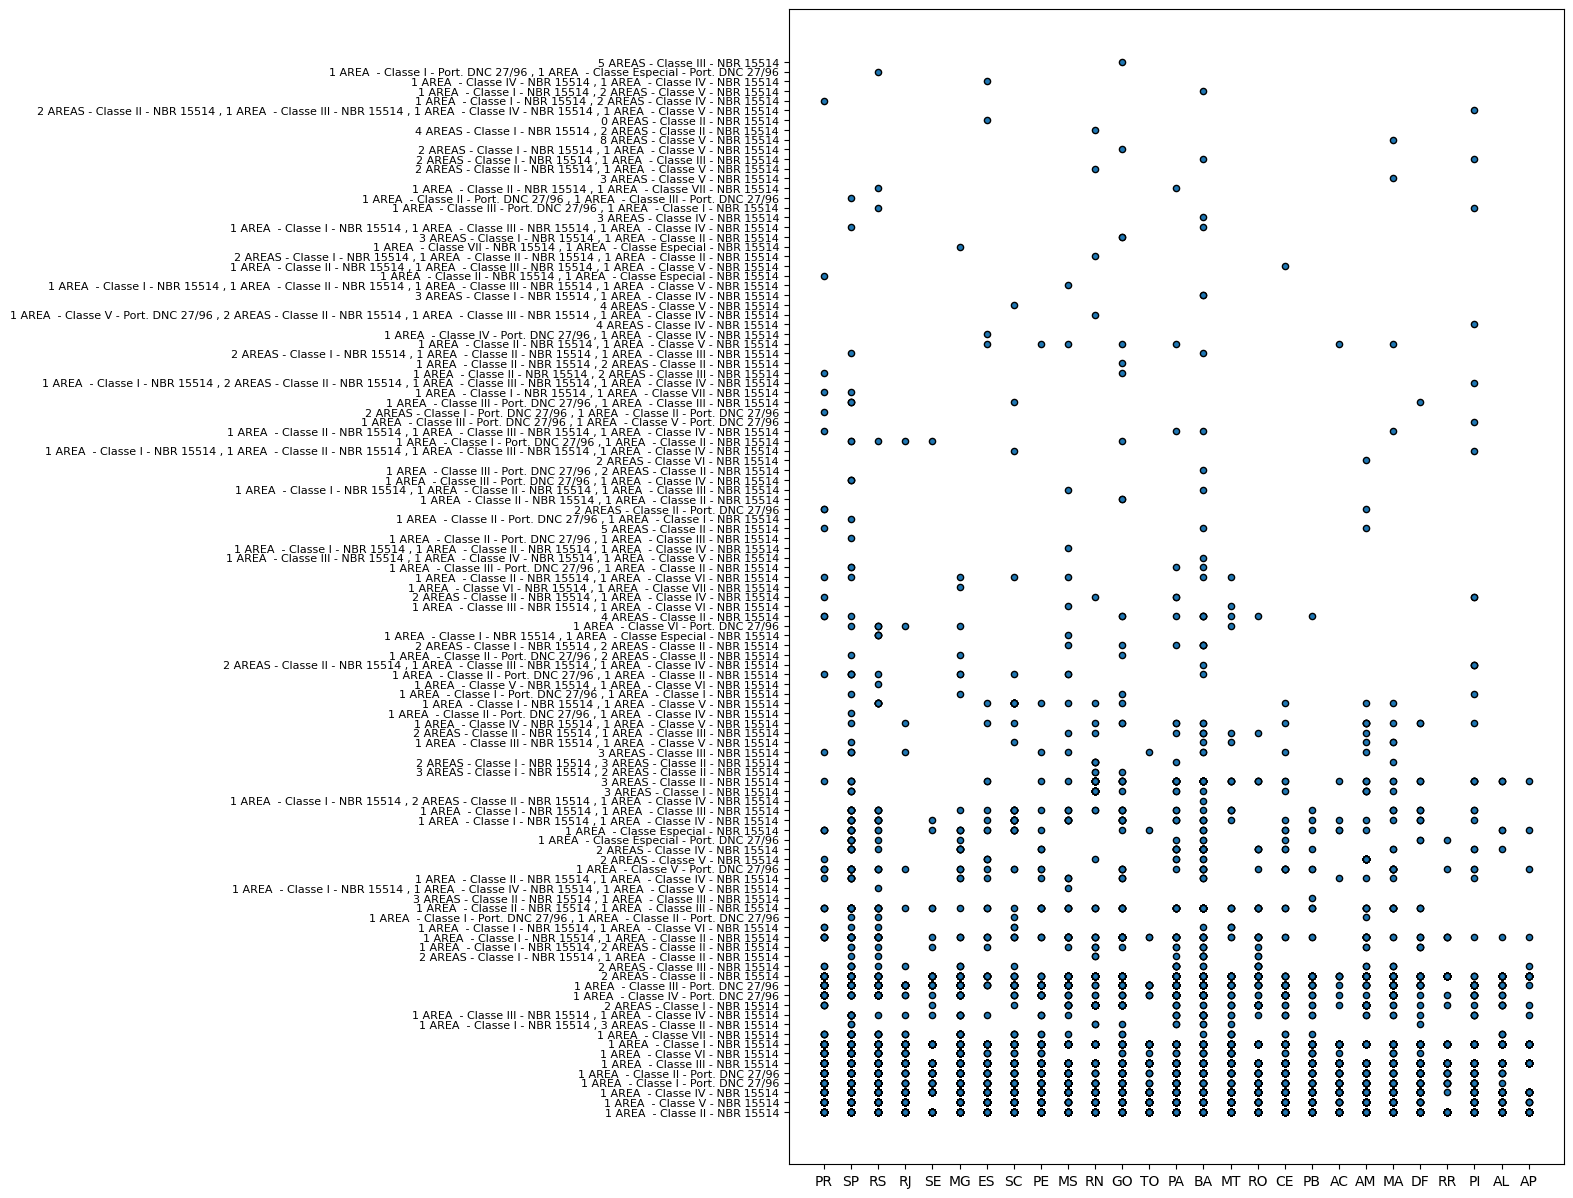

In [ ]:
#Plotando gráfico CLASSE X UF
plt.figure(figsize=(10,15))
plt.scatter(X,y, edgecolor='k', s=20)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=8)
plt.show()

In [ ]:
X, y = distr.DISTRIBUIDORA, distr.UF

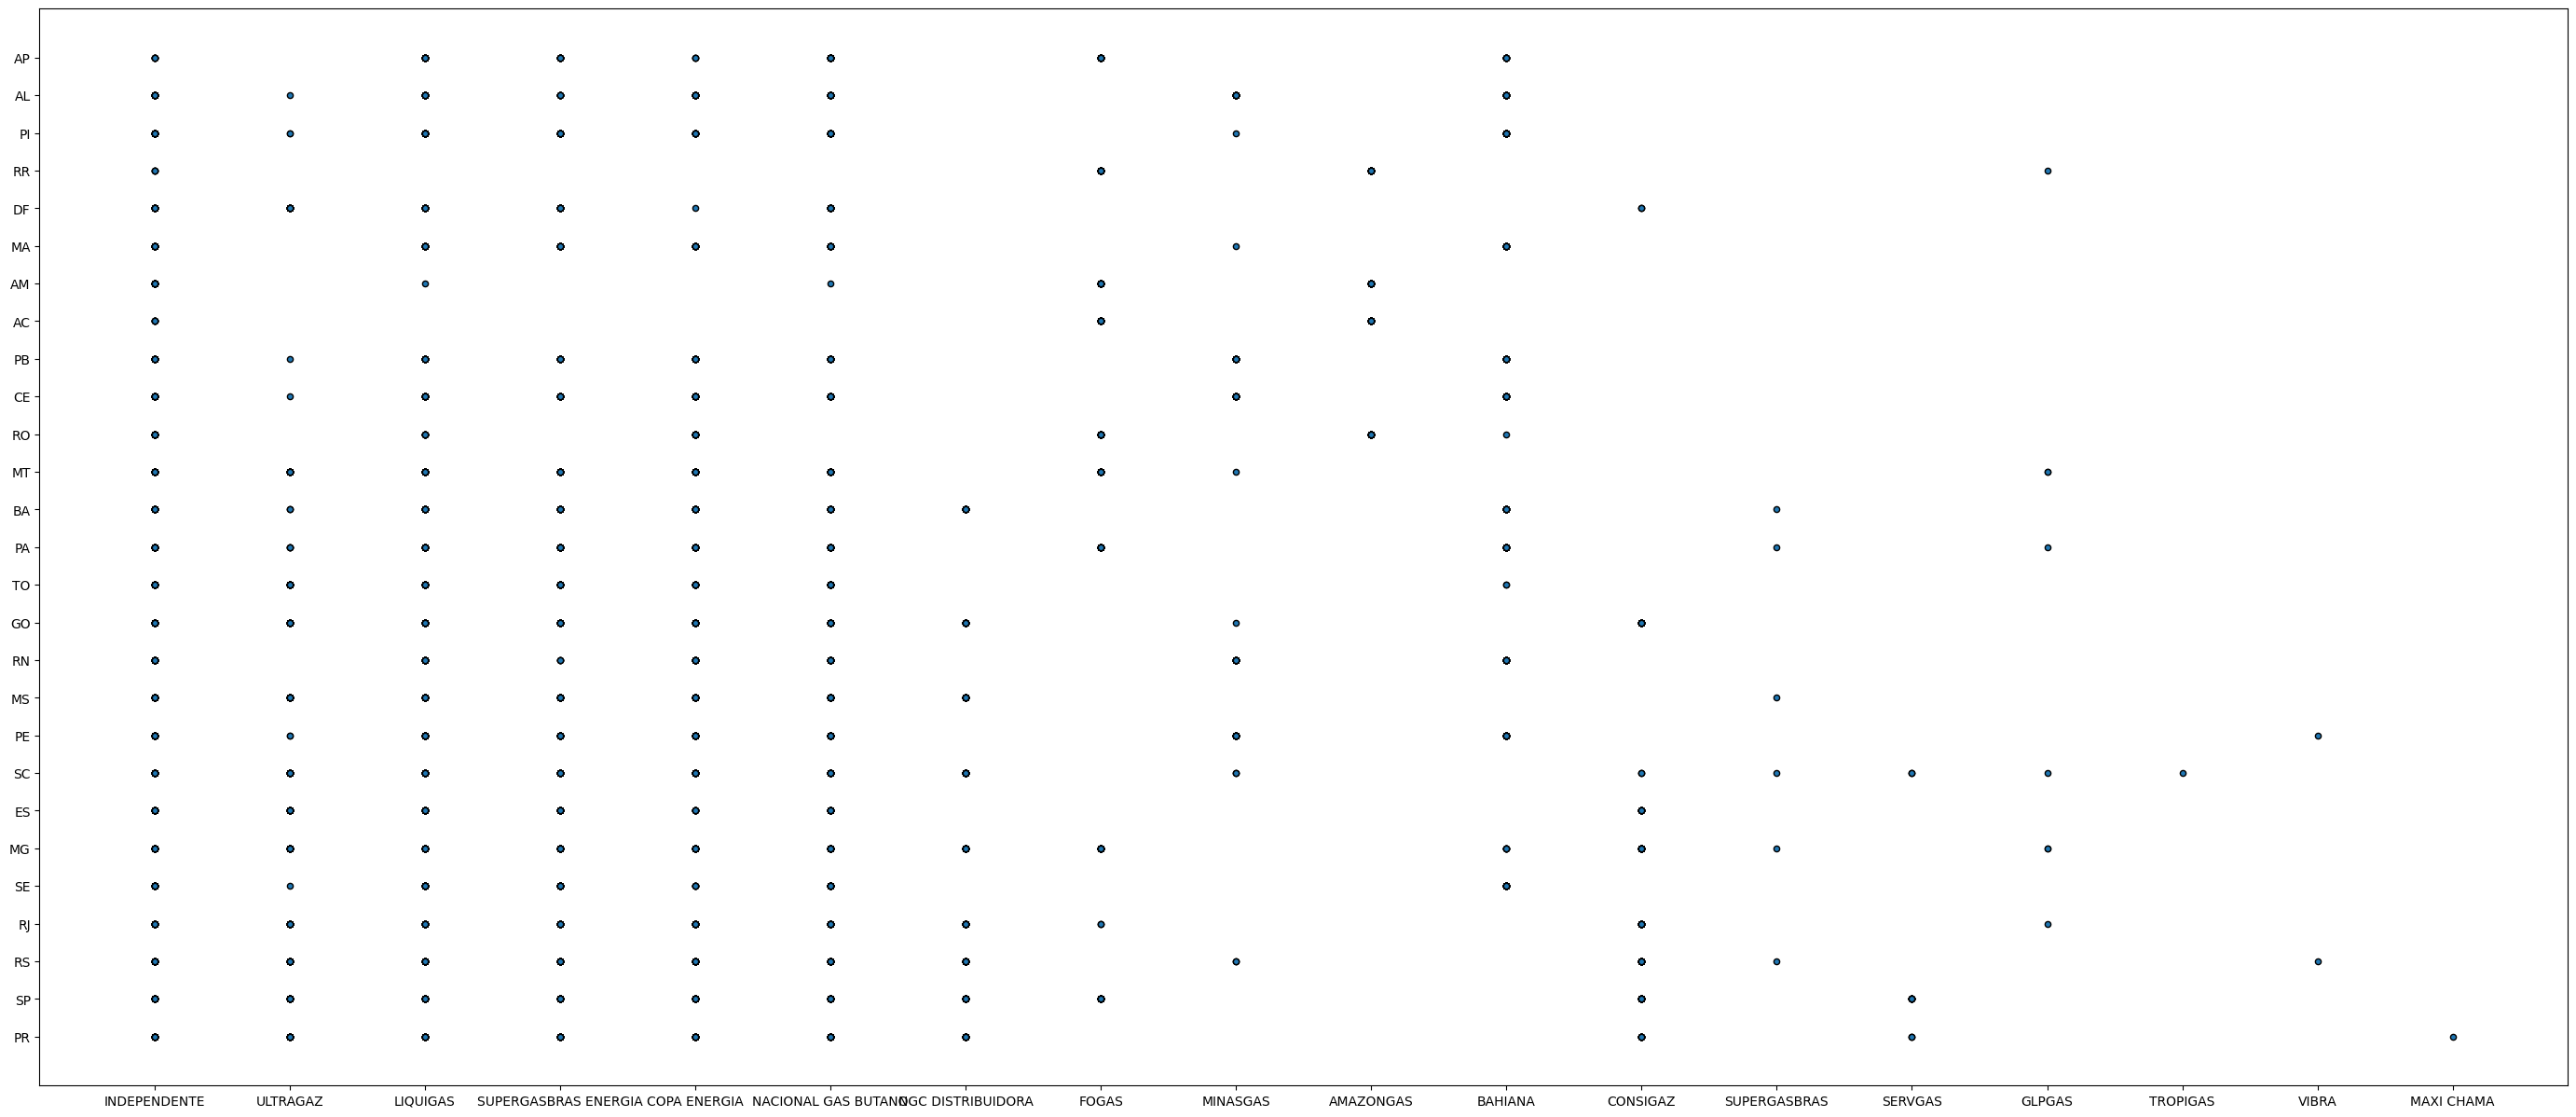

In [ ]:
#plotando UF X DISTRIBUIDORA
plt.figure(figsize=(35,15))
plt.scatter(X,y, edgecolor='k', s=20)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.show()

In [ ]:
#passando dataset para df2
df2 = distr
df2.head()

,AUTORIZACAO,DATAPUBLICACAO,RAZAOSOCIAL,CNPJ,CEP,UF,MUNICIPIO,DISTRIBUIDORA,CLASSE
0,001/GLP/PR0002247,2007-11-23,BONNO GAS COMERCIO DE GAS LTDA,5823241000154,83706160,PR,ARAUCARIA,INDEPENDENTE,1 AREA - Classe II - NBR 15514
1,001/GLP/SP0008390,2006-09-11,CIDIGAS COMERCIO DE GAS LTDA,302480000145,12234000,SP,SAO JOSE DOS CAMPOS,ULTRAGAZ,1 AREA - Classe II - NBR 15514
2,001/GLP/RS0005876,2006-01-16,COMÉRCIO E DISTRIBUIDORA DE GÁS FARROUPILHA LT...,94458767000102,95180000,RS,FARROUPILHA,LIQUIGAS,1 AREA - Classe V - NBR 15514
3,001/GLP/RS0006697,2006-04-27,LUIZ ANTONIO BERTOLETTI,97266456000130,91570000,RS,PORTO ALEGRE,LIQUIGAS,1 AREA - Classe IV - NBR 15514
4,001/GLP/RS0007553,2006-07-21,BITTENCOURT CARDOSO DISTR. GAS LT.,89216543000154,92030050,RS,CANOAS,LIQUIGAS,1 AREA - Classe V - NBR 15514


In [ ]:
#função de troca de rótulos de distribuidoras corporativas
cat = ['LIQUIGAS', 'ULTRAGAZ', 'NACIONAL GAS BUTANO', 'BAHIANO', 'COPA ENERGIA', 'SUPERGASBRAS ENERGIA', 'FOGAS', 'CONSIGAZ', 'MINASGAS', 'AMAZONGAS', 'NGC DISTRIBUIDORA', 'GLPGAS', 'SERVGAS', 'SUPERGASBRAS']
i = 0

for i in range(14):
  df2['DISTRIBUIDORA'].replace(cat[i], 1, inplace=True)

df2.head(25)

<ipython-input-17-8e5cfffcb641>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DISTRIBUIDORA'].replace(cat[i], 1, inplace=True)


,AUTORIZACAO,DATAPUBLICACAO,RAZAOSOCIAL,CNPJ,CEP,UF,MUNICIPIO,DISTRIBUIDORA,CLASSE
0,001/GLP/PR0002247,2007-11-23,BONNO GAS COMERCIO DE GAS LTDA,5823241000154,83706160,PR,ARAUCARIA,INDEPENDENTE,1 AREA - Classe II - NBR 15514
1,001/GLP/SP0008390,2006-09-11,CIDIGAS COMERCIO DE GAS LTDA,302480000145,12234000,SP,SAO JOSE DOS CAMPOS,1,1 AREA - Classe II - NBR 15514
2,001/GLP/RS0005876,2006-01-16,COMÉRCIO E DISTRIBUIDORA DE GÁS FARROUPILHA LT...,94458767000102,95180000,RS,FARROUPILHA,1,1 AREA - Classe V - NBR 15514
3,001/GLP/RS0006697,2006-04-27,LUIZ ANTONIO BERTOLETTI,97266456000130,91570000,RS,PORTO ALEGRE,1,1 AREA - Classe IV - NBR 15514
4,001/GLP/RS0007553,2006-07-21,BITTENCOURT CARDOSO DISTR. GAS LT.,89216543000154,92030050,RS,CANOAS,1,1 AREA - Classe V - NBR 15514
5,001/GLP/RS0008233,2006-08-29,IVO QUANDT TIMM,1341884000100,96600000,RS,CANGUCU,1,1 AREA - Classe II - NBR 15514
6,001/GLP/SP0020463,2008-04-18,ALENCAR PEREIRA,4702847000179,9972100,SP,DIADEMA,1,1 AREA - Classe II - NBR 15514
7,001/GLP/RS0013869,2007-03-29,ROGÉRIO A. BORGES,7037836000100,99890000,RS,MAXIMILIANO DE ALMEIDA,1,1 AREA - Classe I - Port. DNC 27/96
8,001/GLP/SP0012271,2007-02-15,ODIMAS JOSÉ DIAS - ME.,59399055000169,15370000,SP,PEREIRA BARRETO,1,1 AREA - Classe II - Port. DNC 27/96
9,001/GLP/RS0010921,2007-01-16,MÔNICA DOS SANTOS FLORES - ME,8201168000177,96505830,RS,CACHOEIRA DO SUL,1,1 AREA - Classe II - NBR 15514


In [ ]:
#função de troca de distribuidoras independentes por 0
df2['DISTRIBUIDORA'].replace('INDEPENDENTE', 0, inplace=True)

df2.head(25)

<ipython-input-18-bab2d68d83d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DISTRIBUIDORA'].replace('INDEPENDENTE', 0, inplace=True)


,AUTORIZACAO,DATAPUBLICACAO,RAZAOSOCIAL,CNPJ,CEP,UF,MUNICIPIO,DISTRIBUIDORA,CLASSE
0,001/GLP/PR0002247,2007-11-23,BONNO GAS COMERCIO DE GAS LTDA,5823241000154,83706160,PR,ARAUCARIA,0,1 AREA - Classe II - NBR 15514
1,001/GLP/SP0008390,2006-09-11,CIDIGAS COMERCIO DE GAS LTDA,302480000145,12234000,SP,SAO JOSE DOS CAMPOS,1,1 AREA - Classe II - NBR 15514
2,001/GLP/RS0005876,2006-01-16,COMÉRCIO E DISTRIBUIDORA DE GÁS FARROUPILHA LT...,94458767000102,95180000,RS,FARROUPILHA,1,1 AREA - Classe V - NBR 15514
3,001/GLP/RS0006697,2006-04-27,LUIZ ANTONIO BERTOLETTI,97266456000130,91570000,RS,PORTO ALEGRE,1,1 AREA - Classe IV - NBR 15514
4,001/GLP/RS0007553,2006-07-21,BITTENCOURT CARDOSO DISTR. GAS LT.,89216543000154,92030050,RS,CANOAS,1,1 AREA - Classe V - NBR 15514
5,001/GLP/RS0008233,2006-08-29,IVO QUANDT TIMM,1341884000100,96600000,RS,CANGUCU,1,1 AREA - Classe II - NBR 15514
6,001/GLP/SP0020463,2008-04-18,ALENCAR PEREIRA,4702847000179,9972100,SP,DIADEMA,1,1 AREA - Classe II - NBR 15514
7,001/GLP/RS0013869,2007-03-29,ROGÉRIO A. BORGES,7037836000100,99890000,RS,MAXIMILIANO DE ALMEIDA,1,1 AREA - Classe I - Port. DNC 27/96
8,001/GLP/SP0012271,2007-02-15,ODIMAS JOSÉ DIAS - ME.,59399055000169,15370000,SP,PEREIRA BARRETO,1,1 AREA - Classe II - Port. DNC 27/96
9,001/GLP/RS0010921,2007-01-16,MÔNICA DOS SANTOS FLORES - ME,8201168000177,96505830,RS,CACHOEIRA DO SUL,1,1 AREA - Classe II - NBR 15514


In [ ]:
#função de troca de UF's por seus códigos
ufs = ['AC','AL','AP','AM','BA','CE','ES','GO','MA','MT','MS','MG','PA','PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO','DF']
cod = ['12','27','16','13','29','23','32','52','21','51','50','31','15','25','41','26','22','33','24','43','11','14','42','35','28','17','53']
i = 0

for i in range(26):
  df2['UF'].replace(ufs[i], cod[i], inplace=True)

df2.head(25)

<ipython-input-19-cb12d0f45746>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['UF'].replace(ufs[i], cod[i], inplace=True)


,AUTORIZACAO,DATAPUBLICACAO,RAZAOSOCIAL,CNPJ,CEP,UF,MUNICIPIO,DISTRIBUIDORA,CLASSE
0,001/GLP/PR0002247,2007-11-23,BONNO GAS COMERCIO DE GAS LTDA,5823241000154,83706160,41,ARAUCARIA,0,1 AREA - Classe II - NBR 15514
1,001/GLP/SP0008390,2006-09-11,CIDIGAS COMERCIO DE GAS LTDA,302480000145,12234000,35,SAO JOSE DOS CAMPOS,1,1 AREA - Classe II - NBR 15514
2,001/GLP/RS0005876,2006-01-16,COMÉRCIO E DISTRIBUIDORA DE GÁS FARROUPILHA LT...,94458767000102,95180000,43,FARROUPILHA,1,1 AREA - Classe V - NBR 15514
3,001/GLP/RS0006697,2006-04-27,LUIZ ANTONIO BERTOLETTI,97266456000130,91570000,43,PORTO ALEGRE,1,1 AREA - Classe IV - NBR 15514
4,001/GLP/RS0007553,2006-07-21,BITTENCOURT CARDOSO DISTR. GAS LT.,89216543000154,92030050,43,CANOAS,1,1 AREA - Classe V - NBR 15514
5,001/GLP/RS0008233,2006-08-29,IVO QUANDT TIMM,1341884000100,96600000,43,CANGUCU,1,1 AREA - Classe II - NBR 15514
6,001/GLP/SP0020463,2008-04-18,ALENCAR PEREIRA,4702847000179,9972100,35,DIADEMA,1,1 AREA - Classe II - NBR 15514
7,001/GLP/RS0013869,2007-03-29,ROGÉRIO A. BORGES,7037836000100,99890000,43,MAXIMILIANO DE ALMEIDA,1,1 AREA - Classe I - Port. DNC 27/96
8,001/GLP/SP0012271,2007-02-15,ODIMAS JOSÉ DIAS - ME.,59399055000169,15370000,35,PEREIRA BARRETO,1,1 AREA - Classe II - Port. DNC 27/96
9,001/GLP/RS0010921,2007-01-16,MÔNICA DOS SANTOS FLORES - ME,8201168000177,96505830,43,CACHOEIRA DO SUL,1,1 AREA - Classe II - NBR 15514


In [ ]:
#criação do novo dataset com as 3 colunas necessárias para o modelo
df_f = df2[['UF', 'DISTRIBUIDORA', 'CLASSE']]
df_f.head()

,UF,DISTRIBUIDORA,CLASSE
0,41,0,1 AREA - Classe II - NBR 15514
1,35,1,1 AREA - Classe II - NBR 15514
2,43,1,1 AREA - Classe V - NBR 15514
3,43,1,1 AREA - Classe IV - NBR 15514
4,43,1,1 AREA - Classe V - NBR 15514


In [ ]:
#LOAD do novo dataset tratado como um arquivo .csv
df_f.to_csv('df_treated.csv')

In [ ]:
#puxando dataset do drive novo
caminho2 = '/content/drive/MyDrive/Colab Notebooks/dft.xlsx'
dft = pd.read_excel(caminho2)

In [ ]:
dft.head()

,UF,DISTRIBUIDORA,CLASSE
0,41,0,Classe II
1,35,1,Classe II
2,43,1,Classe V
3,43,1,Classe IV
4,43,1,Classe V


In [ ]:
#função de troca das classes por seus números
ufs = ['Classe I','Classe II','Classe III','Classe IV','Classe V','Classe VI','Classe VII','Classe Especial']
cod = ['1','2','3','4','5','6','7','8']
i = 0

for i in range(8):
  dft['CLASSE'].replace(ufs[i], cod[i], inplace=True)

dft.head()

,UF,DISTRIBUIDORA,CLASSE
0,41,0,2
1,35,1,2
2,43,1,5
3,43,1,4
4,43,1,5


In [ ]:
#importação do KNN Classifier e da função para separação em treino e teste
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#separação do conjunto em treino e teste com target em Classe
X_train, X_test, y_train, y_test = train_test_split(dft, dft['CLASSE'],
test_size=0.3, random_state=1)

In [ ]:
#definição da variavel vizinhos que sera o k do KNN e instanciando Classifier com a variavel
vizinhos = 10
clf = KNeighborsClassifier(n_neighbors=vizinhos)

In [ ]:
#fazendo fit dos dados no modelo
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
#fazendo predição pelo knn instanciado e armazenando resultado de predicao
predicao = clf.predict(X_test)

In [ ]:
#breve visualização da variavel de predicao obtida
predicao

array(['2', '3', '4', ..., '3', '1', '2'], dtype=object)

In [ ]:
#importando metricas para o KNN e exibindo com base no y de teste e a variavel de predicao.
from sklearn.metrics import classification_report
print(classification_report(y_test, predicao))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4080
           2       1.00      1.00      1.00      6546
           3       1.00      1.00      1.00      4436
           4       1.00      1.00      1.00      1782
           5       0.97      1.00      0.99       469
           6       0.79      0.83      0.81        77
           7       0.58      0.32      0.41        22
           8       1.00      0.61      0.76        18

    accuracy                           1.00     17430
   macro avg       0.92      0.84      0.87     17430
weighted avg       1.00      1.00      1.00     17430



In [ ]:
vizinhos = 3
clf = KNeighborsClassifier(n_neighbors=vizinhos)
clf.fit(X_train,y_train)
predicao = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicao))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4080
           2       1.00      1.00      1.00      6546
           3       1.00      1.00      1.00      4436
           4       1.00      1.00      1.00      1782
           5       0.99      1.00      0.99       469
           6       0.86      0.94      0.89        77
           7       0.83      0.45      0.59        22
           8       1.00      0.89      0.94        18

    accuracy                           1.00     17430
   macro avg       0.96      0.91      0.93     17430
weighted avg       1.00      1.00      1.00     17430

